In [6]:
## Jupyter notebook in python
## Produces plots allowing choice of analogue domain

## Caveat: 

In [7]:
import analogue_functions_C3S as my

import xarray as xr
import os
import subprocess
import numpy as np
import iris
import calendar
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.feature as cf
import glob
from iris.util import equalise_attributes
from iris.util import unify_time_units
import scipy.stats as stats


In [8]:
# Defining the variables:
date = [2025, 'Apr', 5]  
impact_domain = [39, 34, -86, -93]# Impact region, [NORTH, SOUTH, WEST, EAST] 
Haz = 'tp' # Hazard variable, 't2m' or 'tp' 

# Taken from C3S_analogues_Domain.ipynb / expert judgement
z500_domain = [50, 25, -70, -110]
slp_domain = [50, 20, -60, -120]


In [9]:
### Automated variables - can be adjusted for sensitivity testing

# months to include, automatically three calendar month window around the event
month = date[1]
X = list(calendar.month_abbr)
i=X.index(month)
if 1<i<12:
    months = [X[i-1], X[i], X[i+1]]
elif i == 1:
    months = [X[12], X[i], X[i+1]]
elif i ==12:
    months = [X[i-1], X[i], X[1]]

# Or use this line to manually select different month set (can be full year)
#months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

R1 = [90, -90, 0, -180]  # Assess correlation globally
Y1 = 1950; Y2 = 2025 # Use years 1950-2025 (most available)

# number of analogues to use - set at 1% (assuming 30 day months) of timeslice 1 days 
N = int(((Y2-Y1)*len(months)*30)/100)
# Or use this line to manually select N
# N = 30

In [10]:
### Get event fields
# Check if using ERA5 or extended forecast (for when ERA5 not yet available)
event_data = 'era5'
# Initially using ERA5 daily data, if that gives no data switch to extended:
if my.reanalysis_data_single_date('t2m', date)==None:
    my.ERA5FILESUFFIX = "_daily_extended"
    event_data = "extended"
    print('ERA5 data not yet available, using ECMWF extended forecast for event data')

# If extended also not available give error message:
if my.reanalysis_data_single_date('t2m', date)==None:
    print('Data is not available for that date, please select a date between 1 Jan 1950 and the present day')
    quit() ## If the date has not data (ERA5 or extended) then stop here, and print message above

# Check what it is using:
my.ERA5FILESUFFIX

event_Haz = my.reanalysis_data_single_date(Haz, date)
event_msl = my.reanalysis_data_single_date('msl', date)
event_z500 = my.reanalysis_data_single_date('z500', date)

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_t2m_daily.nc for date [2025, 'Apr', 5]
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_t2m_daily.nc for date [2025, 'Apr', 5]
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_tp_daily.nc for date [2025, 'Apr', 5]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_msl_daily.nc for date [2025, 'Apr', 5]
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2025, 'Apr', 5]


In [11]:
### Lists of analogues for all combination
dates_slp = my.anomaly_period_outputs(Y1, Y2, 'msl', N, date, months, slp_domain)
dates_z500 = my.anomaly_period_outputs(Y1, Y2, 'z500', N, date, months, z500_domain)


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_msl_daily.nc for date [2025, 'Apr', 5]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2025, 'Apr', 5]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

In [12]:
# Calculate the Impact Index for all analogue dates and the event
II_event = my.impact_index(event_Haz, impact_domain)

impact_cube = my.reanalysis_data(Haz, Y1, Y2, months)
II_z500 = []
daily_analogues = my.analogues_list(impact_cube, dates_z500)  
for each in daily_analogues:
    II_z500.append(my.impact_index(each, impact_domain))

II_msl = []
daily_analogues = my.analogues_list(impact_cube, dates_slp)  
for each in daily_analogues:
    II_msl.append(my.impact_index(each, impact_domain))


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


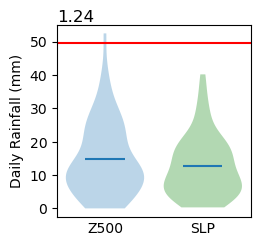

In [13]:
# Violin Plot (to visually check the result)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 2.5))
plots = axs.violinplot([II_z500, II_msl], showmeans=True, showextrema=False, widths = .8)
plots["bodies"][1].set_facecolor('green')
axs.axhline(II_event, color='r', label = 'Event')
axs.set_xticks([1,2], labels=['Z500', 'SLP'])
axs.tick_params(axis='x', length=0)
if Haz == 't2m': axs.set_ylabel('Temperature (K)')
if Haz == 'tp': axs.set_ylabel('Daily Rainfall (mm)')
t, p = stats.ttest_ind(II_z500, II_msl, equal_var=False, alternative='two-sided')
if p < 0.05:
    axs.set_title(('%.2f'%t), pad=-20, loc='left', fontweight="bold")
else:
    axs.set_title(('%.2f'%t), pad=-20, loc='left')

/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0, '# of analogues')

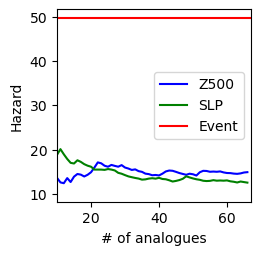

In [14]:
# Shown for larger range of analogue proportions
meanT = []
for i in np.arange(len(II_z500)):
    meanT.append(np.mean(II_z500[:i]))

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 2.5))
axs.plot(meanT, 'b', label = 'Z500')

meanT = []
for i in np.arange(len(II_msl)):
    meanT.append(np.mean(II_msl[:i]))

axs.plot(meanT, 'g', label = 'SLP')
axs.set_xlim([10, N])
axs.axhline(II_event, color='r', label = 'Event')
axs.legend() 
axs.set_ylabel('Hazard')
axs.set_xlabel('# of analogues')

In [15]:
# Summary print out
print('Summary: identify circulation variable')
print('Event definition:')
print('     Date: ', date)
print('     Hazard: ', Haz)
print('     Impact domain: ', impact_domain)
print('     Months assessed: ', months)
print('     Number of analogues: ', N)
print('     Z500 domain:', z500_domain)
print('     MSL domain:', slp_domain)
print('Results if heat / rain:')

u, p = stats.ttest_ind(II_z500, II_msl, equal_var=False, alternative='two-sided')
if np.mean(II_z500) > np.mean(II_msl):
    print('Recommend using Z500')
else:
    print('Recommend using SLP')

print('Results if cold extreme:')

u, p = stats.ttest_ind(II_z500, II_msl, equal_var=False, alternative='two-sided')
if np.mean(II_z500) > np.mean(II_msl):
    print('Recommend using SLP')
else:
    print('Recommend using Z500')


if p < 0.05:
    print('  Statistically significant difference')
else:
    print('  Difference is not statistically significant')


Summary: identify circulation variable
Event definition:
     Date:  [2025, 'Apr', 5]
     Hazard:  tp
     Impact domain:  [39, 34, -86, -93]
     Months assessed:  ['Mar', 'Apr', 'May']
     Number of analogues:  67
     Z500 domain: [50, 25, -70, -110]
     MSL domain: [50, 20, -60, -120]
Results if heat / rain:
Recommend using Z500
Results if cold extreme:
Recommend using SLP
  Difference is not statistically significant
